In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
import statsmodels.api as sm

In [ ]:
'''

There are 5 assumptions to check:-

1.Linearity
2.Normality
3.Homoscadasticity
4.Multicollinearity
5.Autocorrelation

The assumptions can be checked -

a.individually on each and every column of the dataset
b.can be checked on the residuals(errors)-the trend followed by the residuals is equivalent to that of the data.

To avoid complications in case of large datasets, we often check the assumptions on residuals.
There are 2ways to check for these assumptions-
(i)Qualitatively-Graphically
(ii)Quantitatively-statistical tests

why check for assumptions?
It is important to check whether the data follows a linear trend or not before fitting a linear model to it,otherwise
the predictions/outputs given by the model will not be valid and the model itself becomes unreliable(as a linear model
is by default designed to predict data which follows a linear trend).

a.Linearity-for the model predictions to be valid
*b.Normality-so that there are less deviations
c.homoscadasticity-again the error variance has to be constant for the data to exhibit a linear trend
d.multicollinearity-there should be no multicollinearity as it adds to the explainability factor of a linear model.
*e.autocorrelation-no auto correlation.

If at all we find that these assumptions are not met, we can try doing two things:
a.Apply transformations
b.Treat the outliers and then check for these assumptions again.

**************************IF THE ASSUMPTIONS ARE NOT MET OR IF THE DATA DOESNOT FOLLOW A LINEAR TREND EVEN 
AFTER ALL THE TRANSFORMATIONS ETC,THEN WE SIMPLY GO FOR ANOTHER MODEL AS THE DATA IS NOT 
SUITABLE TO BE FITTED WITH A LINEAR MODEL.****************************************

'''

In [3]:
data_ref=pd.read_excel('Refrigerators.xlsx')

In [4]:
data_ref.head()

,Price,Opcost,CoolSize,FreezeSize,Shelves,Features
0,595,75,7.1,5.7,3,2
1,685,75,7.2,5.7,3,1
2,535,67,8.8,4.5,1,6
3,600,67,8.7,4.5,3,5
4,605,67,8.8,4.5,3,3


In [5]:
#build a base model-ols
inp=data_ref.iloc[:,1:]
out=data_ref['Price']

In [6]:
inp_c=sm.add_constant(inp)#add constant to the predictors
ols1=sm.OLS(out,inp_c)#prepare data for the ols model
mod1=ols1.fit()#fit the data to that model
mod1.summary()

/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     32.05
Date:                Thu, 21 May 2020   Prob (F-statistic):           2.27e-11
Time:                        23:02:31   Log-Likelihood:                -201.12
No. Observations:                  37   AIC:                             414.2
Df Residuals:                      31   BIC:                             423.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -797.8082    271.409     -2.940      0.006   -1351.351    -244.265
Opcost        -6.9578      2.275     -3.058      0.005     -11.598      -2.317
CoolSize      76.4971     19.442      3.935      0.000      36.846     116.148
FreezeSize   213.8785     35.761      5.981      0.000     140.943     286.814
Shelves       37.9373      9.886      3.837      0.001      17.774      58.100
Features      23.7636      4.512      5.267      0.000      14.562      32.965
==============================================================================
Omnibus:                        0.974   Durbin-Watson:                   2.321
Prob(Omnibus):                  0.614   Jarque-Bera (JB):                1.005
Skew:                           0.289   Prob(JB):                        0.605
Kurtosis:                       2.435   Cond. No.                     1.97e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

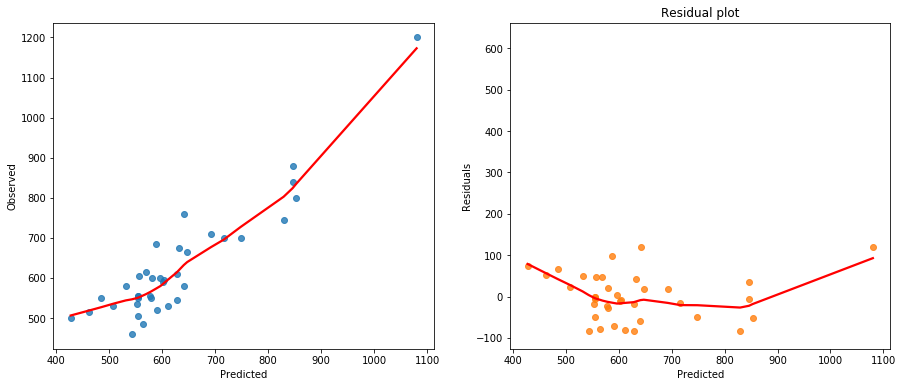

In [14]:
#Linearity-Graphically
predicted_values=mod1.predict()
observed_values=data_ref['Price']
residuals=mod1.resid
fig,axes=plt.subplots(1,2,figsize=(15,6))
sns.regplot(x=predicted_values,y=observed_values,lowess=True, line_kws={'color': 'red'},ax=axes[0])
sns.regplot(x=predicted_values,y=residuals,lowess=True, line_kws={'color': 'red'},ax=axes[1])
axes[0].set(xlabel='Predicted', ylabel='Observed')
axes[1].set(xlabel='Predicted', ylabel='Residuals')
axes[1].set_title('Residual plot')
plt.show()

In [ ]:
'''graphically we can see that the relationship is almost linear.'''

In [19]:
#linearity-statistically(linear rainbow test)
sm.stats.diagnostic.linear_rainbow(res=mod1, frac=0.5)

(1.229003687336259, 0.36464475875614183)

In [ ]:
'''a.null hypothesis for the linear rainbow test is - the residuals are linear
b.p-value obtained is greater than 0.05,so we accept null hypothesis and say that the residuals are linear(here we 
checked the linearity for a fraction of the data)'''

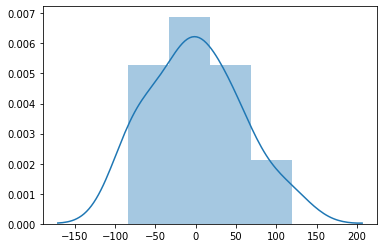

In [20]:
#Normality-Graphically
sns.distplot(residuals)

In [ ]:
'''graphically we can say that the residuals are almost normally distributed.'''

In [21]:
#Normality-Statistically(shapiro test)
stats.shapiro(mod1.resid)

(0.9613720774650574, 0.22325065732002258)

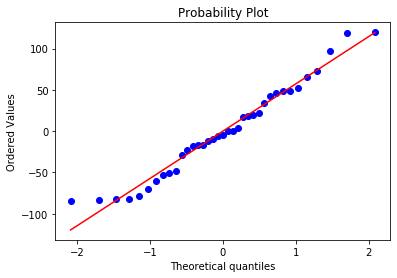

In [22]:
stats.probplot(mod1.resid,fit='norm',plot=plt)
plt.show()

In [ ]:
'''the null hypothesis in case of shapiro test-the residuals are normally distributed
the p-value obtained in the above case is greater than 0.05,so we accept the null hypothesis and say that
the residuals are normally distributed statistically as well.'''

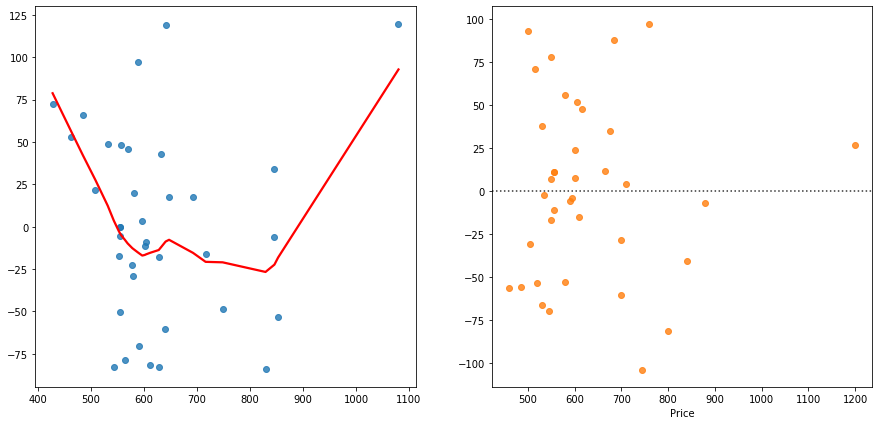

In [24]:
#Homoscadasticity-Graphically
fig1,axes1=plt.subplots(1,2,figsize=(15,7))
sns.regplot(x=predicted_values,y=residuals,lowess=True, line_kws={'color': 'red'},ax=axes1[0])
sns.residplot(out,mod1.resid,ax=axes1[1])
plt.show()

In [ ]:
'''from the above plot we cannot actually say that the residuals are hetero even though there is a variance in the
errors,as there is no particular pattern to it,it is not completely homoscadastic either.'''

In [25]:
#Homoscadasticity-statistically(goldfeld quandt test)
from statsmodels.stats.api import het_goldfeldquandt
het_goldfeldquandt(mod1.resid,mod1.model.exog)
#exog gives all the input features/independent variables/predictors/regressors to the goldfeldquant function

(1.9918809170245648, 0.1160996758106111, 'increasing')

In [ ]:
'''the null hypothesis-residuals are homoscadastic,p-value obtained is greater than 0.05,accept null hypothesis,\
so statistically we ca say that the residuals are homoscadastic.'''

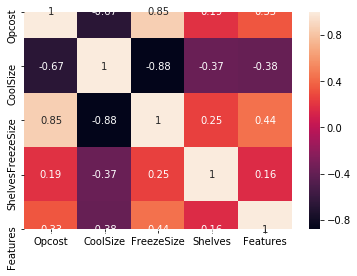

In [26]:
#Multicollinearity-Graphically
sns.heatmap(inp.corr(),annot=True)

In [ ]:
'''there is multicollinearity between three variables-opcost,coolsize,freesize
the operational cost increases with increase in the freezer size and the coolsize decreases.'''

In [ ]:
#Multicollinearity-Statistically(vif-variance inflation factor)
#multi collinearity can be checked for each and every individual feature
# f1 - (f2,f3,f4,f5) -------Rsquare=1 ---------- vif=1/(1-Rsquare) --------- vif=inf
                           #Rsquare=0 ---------- vif=1/(1-Rsquare) --------- vif=1
    
    #f1 - vif=17,  p-val=0.005
    #f2 - vif=14,  p-val=0.02
    #here f1 is more significant than f2 considering p-value,therefore we can't remove features solely looking at vif.

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(inp.values,i) for i in range(inp.shape[1])]
vif['Features']=inp.columns
vif

,VIF,Features
0,259.407845,Opcost
1,24.261754,CoolSize
2,179.916043,FreezeSize
3,6.478725,Shelves
4,3.680741,Features


In [33]:
#remove the feature with highest vif i.e.,opcost and check the other vifs and build a model and check the effect on
#p-values,rsquare and other features
inp1=inp.drop('Opcost',1)

In [35]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(inp1.values,i) for i in range(inp1.shape[1])]
vif['Features']=inp1.columns
vif.sort_values('VIF',ascending=False)
vif

,VIF,Features
0,11.050641,CoolSize
1,19.534441,FreezeSize
2,6.474278,Shelves
3,3.649582,Features


In [36]:
inp_c=sm.add_constant(inp1)
ols2=sm.OLS(out,inp_c)
mod2=ols2.fit()
mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     29.92
Date:                Fri, 22 May 2020   Prob (F-statistic):           2.10e-10
Time:                        00:12:49   Log-Likelihood:                -205.99
No. Observations:                  37   AIC:                             422.0
Df Residuals:                      32   BIC:                             430.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -698.8915    302.602     -2.310      0.028   -1315.272     -82.511
CoolSize      56.4978     20.559      2.748      0.010      14.620      98.375
FreezeSize   131.8951     26.576      4.963      0.000      77.761     186.029
Shelves       35.9230     11.077      3.243      0.003      13.360      58.486
Features      25.1590      5.040      4.992      0.000      14.892      35.426
==============================================================================
Omnibus:                        1.106   Durbin-Watson:                   2.556
Prob(Omnibus):                  0.575   Jarque-Bera (JB):                0.595
Skew:                           0.307   Prob(JB):                        0.743
Kurtosis:                       3.090   Cond. No.                         291.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
'''

removal of operational cost feature:-

a.reduced the rsquare and adjusted rsquare values
b.but the intercept p-value didnot decrease and become so significant that the model has to be called as intercept
only model


*******other features cannot be droped based on vifs as there will be no features left to predict,the predicted
values cannot be considered valid,there is no point in building a linear regression model,it will merely be an 
intercept only model******************

'''